In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Pre-Processing the data

In [4]:
row,col=data.shape
print("Number of Row's in Data :",row)
print("Number of Col's in Data :",col)

Number of Row's in Data : 768
Number of Col's in Data : 9


In [5]:
missing_values = data.isna().sum()
if missing_values.any():
    print(f"Missing values found in {missing_values.index.tolist()}. Consider imputation techniques.")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploratory Data Analysis.

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

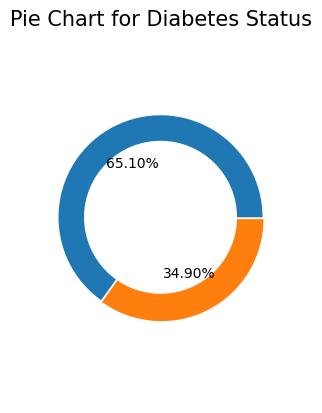

In [12]:
plt.subplot(1, 2, 2)
y = data['Outcome'].value_counts()
explode = [0, 0.02]
plt.pie(y, explode=explode, autopct='%.2f%%')
plt.axis('equal')
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Diabetes Status', size=15)
plt.show()



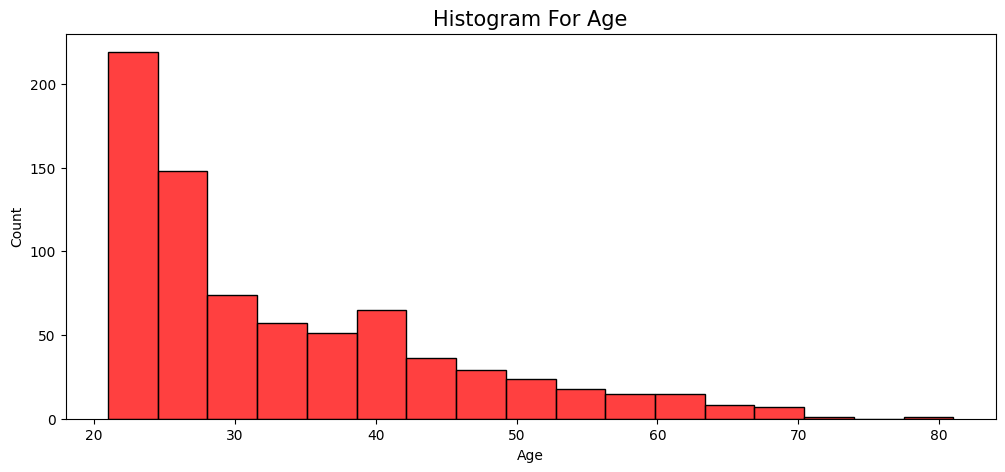

In [13]:
plt.figure(figsize=(12,5))
sns.histplot(data['Age'],kde=False,color='red')
plt.title('Histogram For Age', size=15)
plt.show()

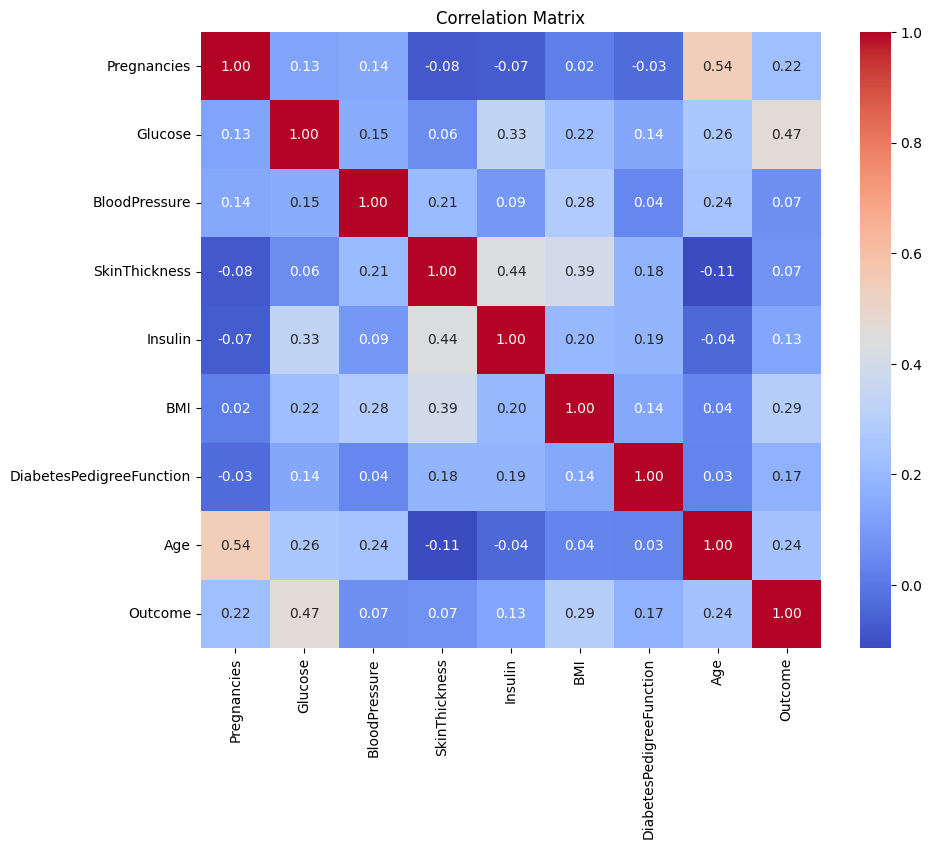

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Split the data into training and testing sets

In [15]:
y = data['Outcome'] # Depended
x = data.drop('Outcome', axis=1) # independents

In [16]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Feature Scaling

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
print('Length of Training Set :',len(X_train))
print('Length of Testing Set :',len(X_test))

Length of Training Set : 537
Length of Testing Set : 231


# Models and Methods

## Perceptron Layer Algorithm

In [19]:
clf_PLA = Perceptron(max_iter=1000, eta0=0.1)
clf_PLA.fit(X_train, y_train)
y_pred_PLA = clf_PLA.predict(X_test)

In [ ]:
accuracy_PLA = accuracy_score(y_test, y_pred_PLA)
print("Accuracy for PLA:", accuracy_PLA)
precision_PLA = precision_score(y_test, y_pred_PLA)
recall_PLA = recall_score(y_test, y_pred_PLA)
f1_PLA = f1_score(y_test, y_pred_PLA)
print("Precision for PLA:", precision_PLA)
print("Recall for PLA:", recall_PLA)
print("F1-score for PLA:", f1_PLA)

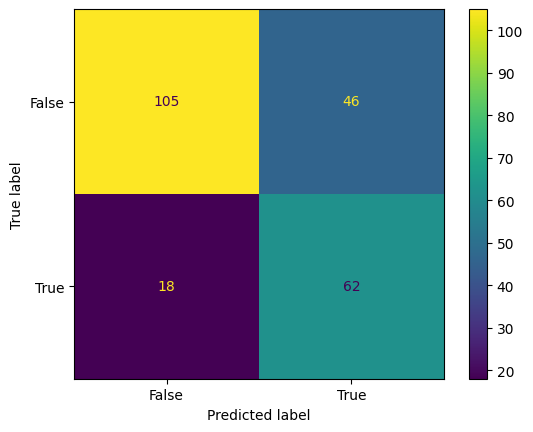

In [21]:
conf_matrix_PLA = confusion_matrix(y_test, y_pred_PLA)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_PLA, display_labels = [False, True])

cm_display.plot()
plt.show()

## Multi-Layer Perceptron

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),max_iter=1000, random_state=42)

In [23]:
mlp.fit(X_train, y_train)
y_pred_MLP = mlp.predict(X_test)

accuracy_MLP = accuracy_score(y_test, y_pred_MLP)
print(f"Accuracy for MLP: {accuracy_MLP}")
precision_MLP = precision_score(y_test, y_pred_MLP)
recall_MLP = recall_score(y_test, y_pred_MLP)
f1_MLP= f1_score(y_test, y_pred_MLP)
print("Precision for MLP:", precision_MLP)
print("Recall for MLP:", recall_MLP)
print("F1-score for MLP:", f1_MLP)

Accuracy for MLP: 0.6926406926406926
Precision for MLP: 0.550561797752809
Recall for MLP: 0.6125
F1-score for MLP: 0.5798816568047338


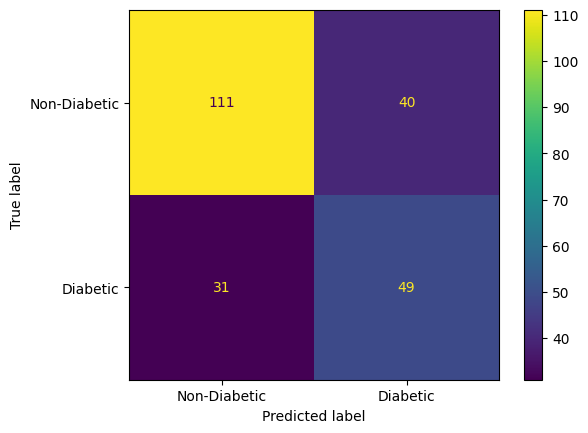

In [24]:
confusion_matrix_MLP = confusion_matrix(y_test, y_pred_MLP)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_MLP, display_labels = ["Non-Diabetic", "Diabetic"])
cm_display.plot()
plt.show()

## KNN

### Finding the k value

In [25]:
k_values = [i for i in range (1,40)]
scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_model, x, y, cv=10)
    scores.append(np.mean(score))

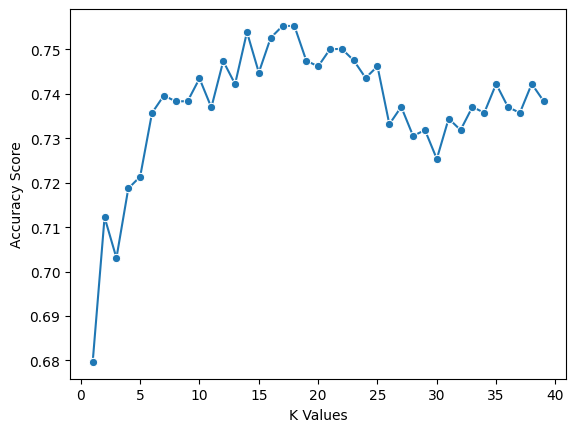

In [26]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

### KNN using the best k values

In [31]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [33]:
y_pred_KNN = knn_model.predict(X_test)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy for KNN:", accuracy_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1_KNN= f1_score(y_test, y_pred_KNN)
print("Precision for KNN:", precision_KNN)
print("Recall for KNN:", recall_KNN)
print("F1-score for KNN:", f1_KNN)

Accuracy for KNN: 0.7272727272727273
Precision for KNN: 0.6440677966101694
Recall for KNN: 0.475
F1-score for KNN: 0.5467625899280575


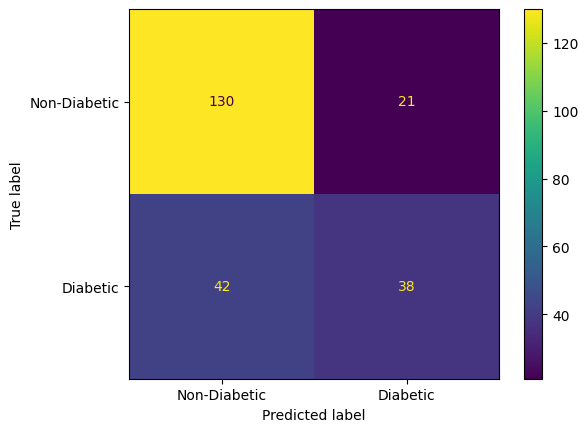

In [34]:
confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN, display_labels = ["Non-Diabetic", "Diabetic"])
cm_display.plot()
plt.show()

## SVM (linear kernel)

In [35]:
clf_SVM = svm.SVC(kernel='linear') # Linear Kernel
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM )
print("Accuracy for SVM:", accuracy_SVM )
precision_SVM  = precision_score(y_test, y_pred_SVM )
recall_SVM = recall_score(y_test, y_pred_SVM )
f1_SVM = f1_score(y_test, y_pred_SVM )
print("Precision for SVM:", precision_SVM )
print("Recall for SVM:", recall_SVM )
print("F1-score for SVM:", f1_SVM )

Accuracy for SVM: 0.7489177489177489
Precision for SVM: 0.6410256410256411
Recall for SVM: 0.625
F1-score for SVM: 0.6329113924050633


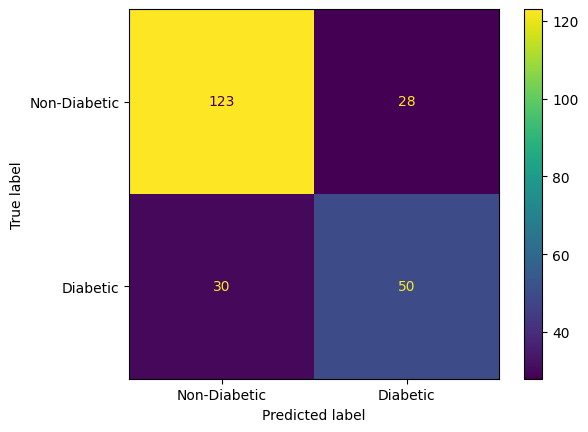

In [36]:
confusion_matrix_SVM  = confusion_matrix(y_test, y_pred_SVM )
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_SVM , display_labels = ["Non-Diabetic", "Diabetic"])
cm_display.plot()
plt.show()

## Naive Bayes

In [37]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_GNB = gnb.predict(X_test)
accuracy_GNB= accuracy_score(y_test, y_pred_GNB )
print("Accuracy for GNB:", accuracy_GNB)
precision_GNB  = precision_score(y_test, y_pred_GNB)
recall_GNB= recall_score(y_test, y_pred_GNB )
f1_GNB = f1_score(y_test, y_pred_GNB)
print("Precision for GNB:", precision_GNB)
print("Recall for GNB:", recall_GNB)
print("F1-score for GNB:", f1_GNB)

Accuracy for GNB: 0.7445887445887446
Precision for GNB: 0.6235294117647059
Recall for GNB: 0.6625
F1-score for GNB: 0.6424242424242423


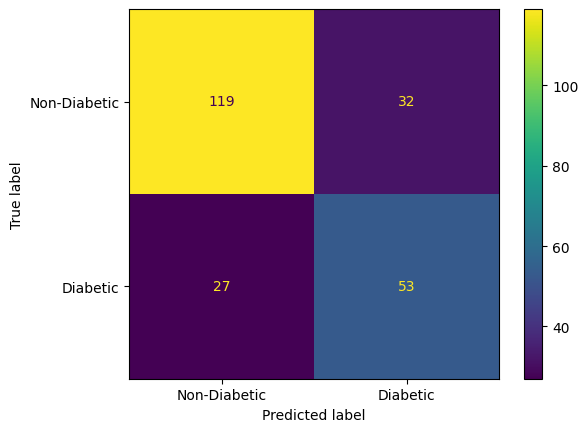

In [38]:
confusion_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_GNB, display_labels = ["Non-Diabetic", "Diabetic"])
cm_display.plot()
plt.show()

In [39]:
test_df = pd.DataFrame(
    {'True': y_test, 'PLA': y_pred_PLA, 'MLP': y_pred_MLP, 'KNN': y_pred_KNN, 'SVM': y_pred_SVM, 'GNB': y_pred_GNB})

# ROC Curve

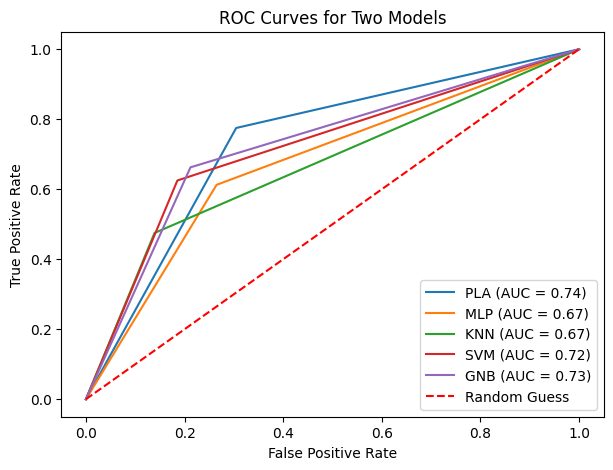

In [40]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 5))

for model in ['PLA','MLP','KNN','SVM','GNB']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

From the ROC curve, we can confirm that none of the models are overfitting or underfitting.

# Results

In [41]:
acc = [accuracy_PLA,accuracy_MLP,accuracy_KNN,accuracy_SVM,accuracy_GNB]
prec = [precision_PLA,precision_MLP,precision_KNN,precision_SVM,precision_GNB]
recall = [recall_PLA,recall_MLP,recall_KNN,recall_SVM,recall_GNB]
f1 = [f1_PLA,f1_MLP,f1_KNN,f1_SVM,f1_GNB]
models = ['PLA','MLP','KNN','SVM','GNB']
print(f" __________________________________________________________________")
print(f"| Models | Accuracy \t| Precision \t| Recall \t| F1_score |")

for i in range(5):
    print(f"| {models[i]} \t | {acc[i]:.6f} \t| {prec[i]:.6f}\t| {recall[i]:.6f} \t| {f1[i]:.6f} |")
print(f" __________________________________________________________________")

 __________________________________________________________________
| Models | Accuracy 	| Precision 	| Recall 	| F1_score |
| PLA 	 | 0.722944 	| 0.574074	| 0.775000 	| 0.659574 |
| MLP 	 | 0.692641 	| 0.550562	| 0.612500 	| 0.579882 |
| KNN 	 | 0.727273 	| 0.644068	| 0.475000 	| 0.546763 |
| SVM 	 | 0.748918 	| 0.641026	| 0.625000 	| 0.632911 |
| GNB 	 | 0.744589 	| 0.623529	| 0.662500 	| 0.642424 |
 __________________________________________________________________


With respect to accuracy, SVM performs the best (with 74.8%), followed by GNB(74.4%), KNN(72.7%), PLA(72.2%) and MLP(69.2).

# K-means Clustering

## Finding K using Elbow method

In [42]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(x)
    sse.append(km.inertia_)

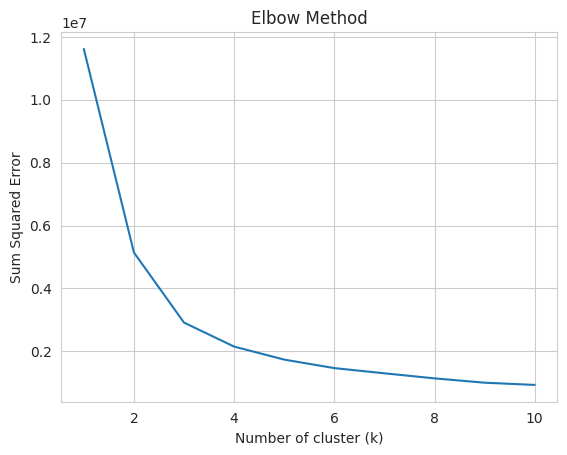

In [43]:

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()


## K-means for n = 2 and n = 3

In [44]:
kmeans_2 = KMeans(n_clusters=2, random_state=2)
kmeans_2.fit(x)
kmeans_3 = KMeans(n_clusters=3, random_state=2)
kmeans_3.fit(x)

KMeans(n_clusters=3, random_state=2)

In [45]:
pred_km_2 = kmeans_2.labels_
pred_km_3 = kmeans_3.labels_

In [46]:
len(pred_km_2)
data.shape

(768, 9)

In [48]:
accuracy_km_2=[]
for i in range(x.shape[0]):
    if y[i]==pred_km_2[i]:
        accuracy_km_2.append(pred_km_2[i])
accuracy_km_3=[]
for i in range(x.shape[0]):
    if y[i]==pred_km_3[i]:
        accuracy_km_3.append(pred_km_3[i])

## Accuracy

In [49]:
print("Accuracy with n = 2:",len(accuracy_km_2)/x.shape[0])
print("Accuracy with n = 3:",len(accuracy_km_3)/x.shape[0])

Accuracy with n = 2: 0.66015625
Accuracy with n = 3: 0.21354166666666666


## Scatterplot for 2 clusters

Text(0, 0.5, 'Glucose')

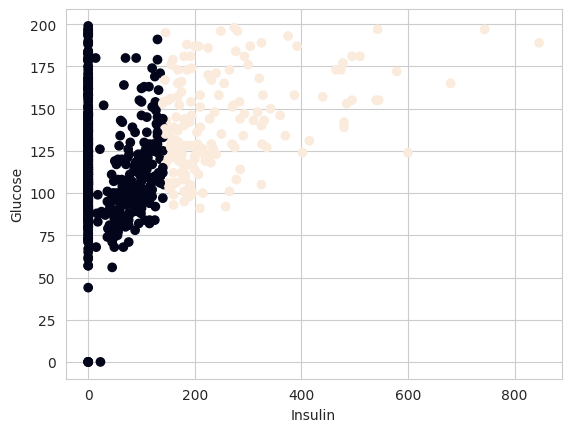

In [50]:
plt.scatter(x="Insulin",y="Glucose",data=x,c=pred_km_2)
plt.xlabel("Insulin")
plt.ylabel("Glucose")

## Scatterplot for 3 clusters

Text(0, 0.5, 'Glucose')

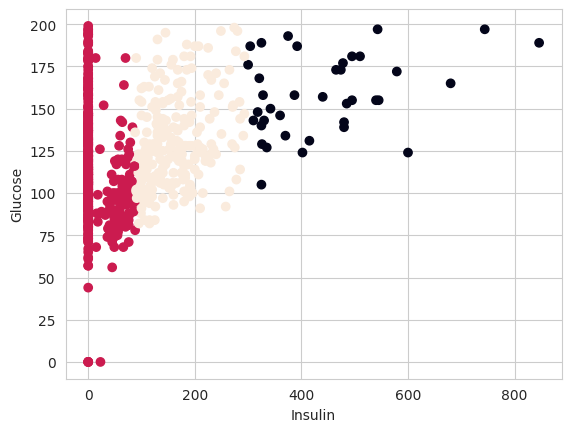

In [51]:
plt.scatter(x="Insulin",y="Glucose",data=x,c=pred_km_3)
plt.xlabel("Insulin")
plt.ylabel("Glucose")